# **BIRCH Clustering Model Theory**


## BIRCH Clustering

---

## Theory
BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies) is a hierarchical clustering algorithm designed for large datasets. It uses a tree-based data structure called the **Clustering Feature Tree (CF Tree)** to summarize the data efficiently, making it suitable for datasets with limited memory. BIRCH is widely used in applications like customer segmentation, anomaly detection, and large-scale data mining.

The main idea is to:
- Summarize the dataset using a compact data structure (CF Tree).
- Perform hierarchical clustering on the summarized data.
- Refine clusters using additional clustering algorithms (e.g., K-Means) if needed.

---

## Mathematical Foundation
- **Clustering Feature (CF)**:
  A triplet summarizing the information of a cluster:
  $$ CF = (N, LS, SS) $$
  - \( N \): Number of data points in the cluster.
  - \( LS \): Linear sum of the data points.
  - \( SS \): Square sum of the data points.

- **CF Tree**:
  A height-balanced tree where each node contains a set of CF entries. The tree is built incrementally by inserting data points into the closest CF entry.

- **Distance Metrics**:
  - **Euclidean Distance**:
    $$ d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2} $$
  - **Cluster Distance**:
    The distance between two clusters \( CF_1 \) and \( CF_2 \) can be computed using:
    $$ D(CF_1, CF_2) = \sqrt{\frac{SS_1 + SS_2 - 2 \cdot LS_1 \cdot LS_2}{N_1 + N_2}} $$

---

## Algorithm Steps
1. **Phase 1: Build CF Tree**:
   - Initialize the CF Tree with a threshold for the maximum number of entries in a node.
   - Insert data points into the CF Tree by finding the closest CF entry.
   - Split nodes if the number of entries exceeds the threshold.

2. **Phase 2: Global Clustering**:
   - Apply a hierarchical clustering algorithm (e.g., agglomerative clustering) to the CF Tree to form initial clusters.

3. **Phase 3: Refine Clusters**:
   - Optionally, refine the clusters using additional clustering algorithms (e.g., K-Means).

---

## Key Parameters
- **threshold**: The maximum radius of a subcluster in the CF Tree.
- **branching_factor**: The maximum number of CF subclusters in each node.
- **n_clusters**: The number of clusters to form (if refining with K-Means).

---

## Advantages
- Efficient for large datasets with limited memory.
- Handles noise and outliers well.
- Scalable to high-dimensional data.
- Provides a compact representation of the dataset.

---

## Disadvantages
- Sensitive to the choice of threshold and branching factor.
- Struggles with non-spherical clusters.
- Requires careful tuning of parameters.
- May require additional clustering steps for refinement.

---

## Implementation Tips
- Use a **small threshold** for fine-grained clustering.
- Choose an appropriate **branching factor** to balance memory usage and accuracy.
- Scale features before clustering to ensure equal contribution from all features.
- Use **K-Means** or another clustering algorithm for refinement if needed.

---

## Applications
- Customer segmentation
- Anomaly detection
- Large-scale data mining
- Image segmentation
- Clustering in bioinformatics

BIRCH is a powerful and efficient clustering algorithm, especially for large datasets. While it requires careful parameter tuning, it is a valuable tool for many real-world applications.

## Model Evaluation for BIRCH Clustering

---

### 1. Silhouette Score
**Formula:**
$$
\text{Silhouette Score} = \frac{b - a}{\max(a, b)}
$$
**Description:**
- Measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
- Ranges from -1 to 1.

**Interpretation:**
- Values close to 1 indicate well-separated clusters.
- Values close to 0 indicate overlapping clusters.
- Negative values suggest incorrect clustering.

---

### 2. Davies-Bouldin Index
**Formula:**
$$
\text{DBI} = \frac{1}{k} \sum_{i=1}^k \max_{j \neq i} \left( \frac{\sigma_i + \sigma_j}{d(c_i, c_j)} \right)
$$
**Description:**
- Measures the average similarity ratio of each cluster with the cluster that is most similar to it.
- Lower values indicate better clustering.

**Interpretation:**
- Values closer to 0 indicate better-defined clusters.
- Sensitive to the number of clusters and their separation.

---

### 3. Calinski-Harabasz Index
**Formula:**
$$
\text{CHI} = \frac{\text{Between-Cluster Dispersion}}{\text{Within-Cluster Dispersion}} \times \frac{N - k}{k - 1}
$$
**Description:**
- Measures the ratio of between-cluster dispersion to within-cluster dispersion.
- Higher values indicate better-defined clusters.

**Interpretation:**
- Higher values indicate better clustering.
- Useful for comparing different parameter settings.

---

### 4. Rand Index
**Formula:**
$$
\text{Rand Index} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
$$
**Description:**
- Measures the similarity between two clusterings by counting pairs of points that are assigned to the same or different clusters in both clusterings.

**Interpretation:**
- Ranges from 0 to 1, where 1 indicates perfect agreement.
- Requires ground truth labels for evaluation.

---

### 5. Adjusted Rand Index (ARI)
**Formula:**
$$
\text{ARI} = \frac{\text{Rand Index} - \text{Expected Rand Index}}{\max(\text{Rand Index}) - \text{Expected Rand Index}}
$$
**Description:**
- Adjusted version of the Rand Index that accounts for chance agreement.
- Ranges from -1 to 1.

**Interpretation:**
- Values close to 1 indicate strong agreement.
- Values close to 0 or negative indicate random or poor clustering.

---

### 6. Homogeneity, Completeness, and V-Measure
**Formulas:**
- **Homogeneity:**  
  $$
  h = 1 - \frac{H(C|K)}{H(C)}
  $$
- **Completeness:**  
  $$
  c = 1 - \frac{H(K|C)}{H(K)}
  $$
- **V-Measure:**  
  $$
  v = 2 \cdot \frac{h \cdot c}{h + c}
  $$

**Description:**
- **Homogeneity:** Measures if each cluster contains only members of a single class.
- **Completeness:** Measures if all members of a given class are assigned to the same cluster.
- **V-Measure:** Harmonic mean of homogeneity and completeness.

**Interpretation:**
- Ranges from 0 to 1, where 1 indicates perfect clustering.
- Requires ground truth labels for evaluation.

---

### 7. Cluster Stability
**Description:**
- Measures the consistency of clustering results across different subsamples of the data.
- Evaluated using techniques like bootstrapping or cross-validation.

**Interpretation:**
- Higher stability indicates more reliable clustering.
- Useful for assessing the robustness of BIRCH.

---

### 8. Number of Clusters (k)
**Description:**
- BIRCH requires specifying the number of clusters (k) for the final clustering step.
- Evaluates the appropriateness of the chosen k.

**Interpretation:**
- Use metrics like Silhouette Score or Calinski-Harabasz Index to determine the optimal k.
- Incorrect k may lead to overfitting or underfitting.

---

### 9. Threshold Parameter Analysis
**Description:**
- Evaluates the impact of the threshold parameter on clustering results.
- The threshold determines the maximum radius of a subcluster.

**Interpretation:**
- Smaller thresholds result in more subclusters.
- Larger thresholds result in fewer subclusters.
- Optimal threshold balances granularity and computational efficiency.

---

### 10. Memory Usage and Scalability
**Description:**
- Evaluates the memory usage and scalability of BIRCH for large datasets.
- BIRCH is designed to handle large datasets efficiently by building a CF (Clustering Feature) tree.

**Interpretation:**
- Lower memory usage and faster processing times indicate better scalability.
- Useful for assessing the practicality of BIRCH for large-scale data.

---

## sklearn template [Birch](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html)

### class Birch(*, threshold=0.5, branching_factor=50, n_clusters=3, compute_labels=True, copy=True)

| **Parameter**               | **Description**                                                                                                                                     | **Default**      |
|----------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------|------------------|
| `threshold`                | The radius of the subcluster obtained by merging a new sample and the closest subcluster should be lesser than this value                          | `0.5`            |
| `branching_factor`         | Maximum number of CF subclusters in each node                                                                                                      | `50`             |
| `n_clusters`               | Number of clusters after the final clustering step (if None, no final clustering is performed)                                                    | `3`              |
| `compute_labels`           | Whether to compute labels for each point                                                                                                           | `True`           |
| `copy`                     | If True, the input data is copied; if False, the input data is overwritten                                                                         | `True`           |

-

| **Attribute**              | **Description**                                                                                                                                     |
|----------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------|
| `root_`                    | Root of the CF (Clustering Feature) tree                                                                                                           |
| `dummy_leaf_`              | Start pointer to all the leaves                                                                                                                    |
| `subcluster_centers_`      | Centroids of subclusters read directly from the leaves                                                                                             |
| `subcluster_labels_`       | Labels assigned to the centroids of the subclusters                                                                                                |
| `labels_`                  | Labels of each point (if `compute_labels=True`)                                                                                                    |
| `n_features_in_`           | Number of features seen during fit                                                                                                                  |

-

| **Method**                 | **Description**                                                                                                                                     |
|----------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------|
| `fit(X)`                   | Build a CF tree and perform clustering                                                                                                             |
| `fit_predict(X)`           | Build a CF tree, perform clustering, and return cluster labels                                                                                     |
| `predict(X)`               | Predict the closest cluster for each sample in X                                                                                                   |
| `transform(X)`             | Transform X into subcluster centroids                                                                                                              |
| `get_params()`             | Get parameters for this estimator                                                                                                                   |
| `set_params()`             | Set the parameters of this estimator                                                                                                                |

# BIRCH Clustering - Example

## Data loading

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Iris dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)  # Features
y = pd.Series(data.target)  # Target variable (for comparison, not used in clustering)

# Display the first few rows of the dataset
print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())

Features (X):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target (y):
0    0
1    0
2    0
3    0
4    0
dtype: int64


##  Data processing

In [3]:
# Standardize the features (BIRCH is sensitive to feature scales)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easier plotting
X_scaled = pd.DataFrame(X_scaled, columns=data.feature_names)

# Display the first few rows of the scaled data
print("Scaled Features:")
print(X_scaled.head())

Scaled Features:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


## Plotting data

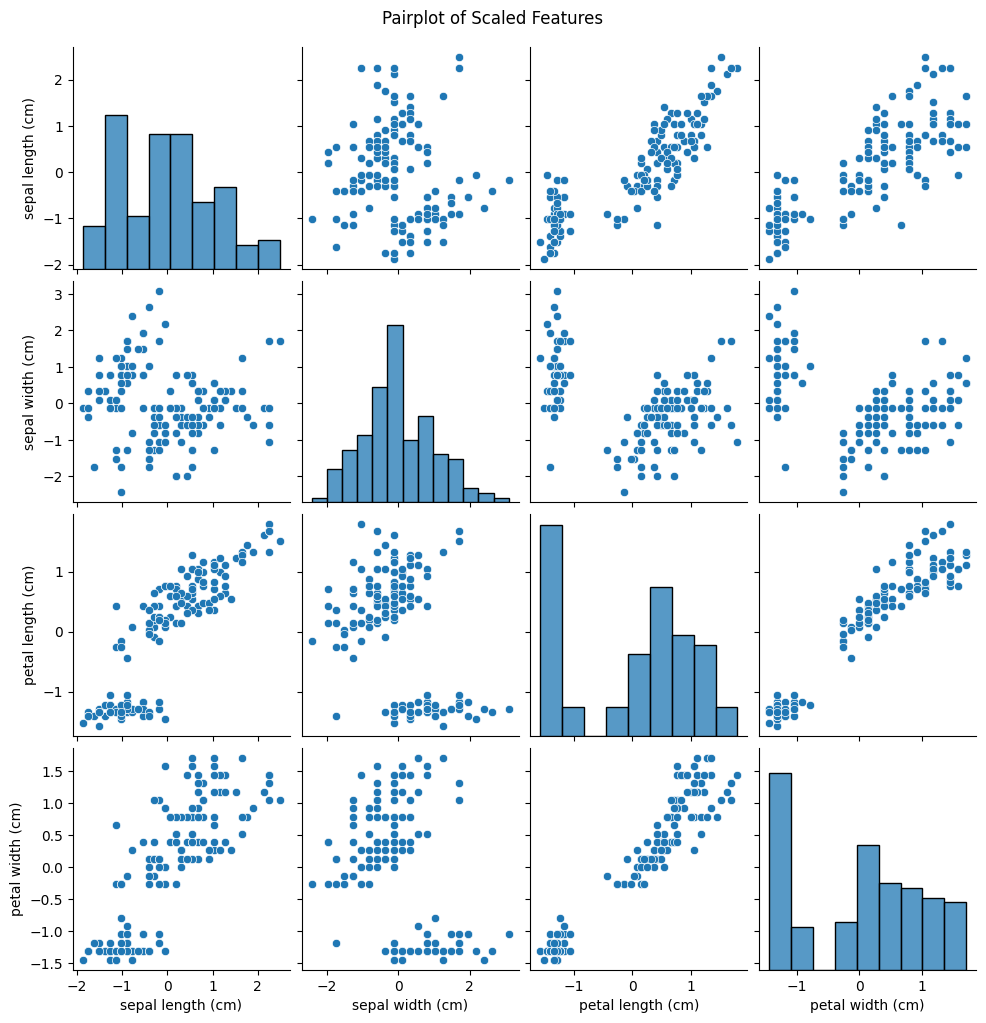

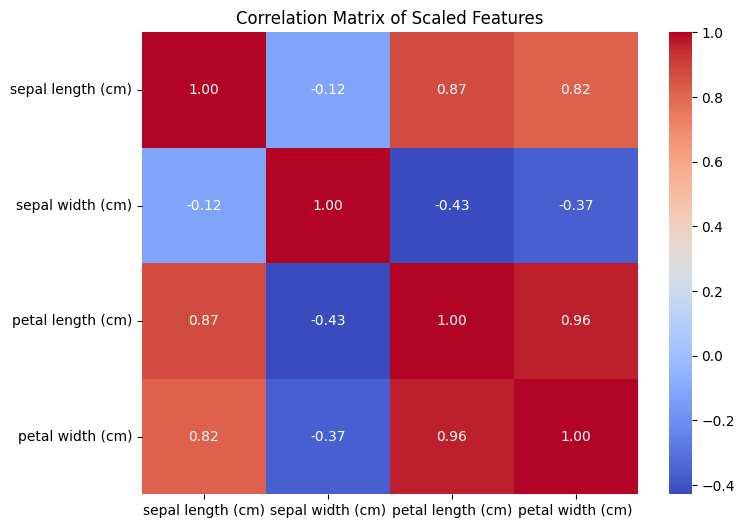

In [4]:
# Plot the distribution of features
sns.pairplot(X_scaled)
plt.suptitle("Pairplot of Scaled Features", y=1.02)
plt.show()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(X_scaled.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Scaled Features")
plt.show()

## Model definition

In [5]:
# Define the BIRCH model
birch = Birch(threshold=0.5, n_clusters=3)  # Adjust threshold and n_clusters as needed

# Fit the model to the scaled data
birch.fit(X_scaled)

# Get the cluster labels
cluster_labels = birch.labels_

# Add cluster labels to the original dataset for visualization
X['Cluster'] = cluster_labels
print("Cluster Labels:")
print(X.head())

# Number of clusters
n_clusters = len(np.unique(cluster_labels))
print(f"Number of clusters: {n_clusters}")

Cluster Labels:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        1  
Number of clusters: 3


## Model evaulation

Silhouette Score: 0.4536


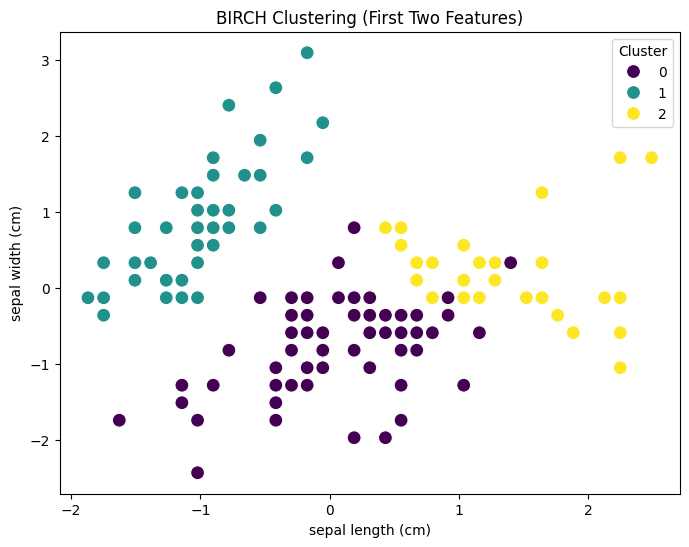

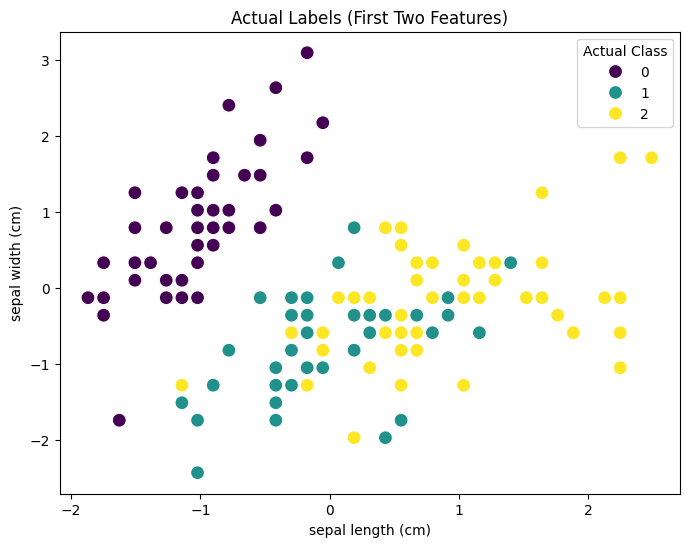

In [6]:
# Evaluate the clustering using Silhouette Score
if n_clusters > 1:  # Silhouette Score requires at least 2 clusters
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"Silhouette Score: {silhouette_avg:.4f}")
else:
    print("Silhouette Score cannot be computed with only one cluster.")

# Plot the clusters (using the first two features for visualization)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled.iloc[:, 0], y=X_scaled.iloc[:, 1], hue=cluster_labels, palette='viridis', s=100)
plt.title("BIRCH Clustering (First Two Features)")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.legend(title='Cluster')
plt.show()

# Compare clusters with actual labels (for visualization purposes only)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled.iloc[:, 0], y=X_scaled.iloc[:, 1], hue=y, palette='viridis', s=100)
plt.title("Actual Labels (First Two Features)")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.legend(title='Actual Class')
plt.show()